## ベクトル

In [1]:
import numpy as np

In [2]:
# ベクトルを定義
a = np.array([2, 1])
a

array([2, 1])

In [3]:
type(a)

numpy.ndarray

In [5]:
# 縦ベクトル
c = np.array([[1, 2], [3, 4]])
c

array([[1, 2],
       [3, 4]])

In [6]:
d = np.array([[1], [2]])
d

array([[1],
       [2]])

In [7]:
# 転置
d.T

array([[1, 2]])

In [9]:
d.T.T  # => 転置を２回繰り返すことで元に戻る

array([[1],
       [2]])

In [10]:
# 足し算と引き算
b = np.array([1, 3])
a + b

array([3, 4])

In [11]:
a - b

array([ 1, -2])

In [12]:
# スカラーとの掛け算
2 * a

array([4, 2])

In [14]:
# 内積
b = np.array([1, 3])
c = np.array([4, 2])
b.dot(c)

10

In [16]:
# 二次元ベクトルの大きさ
a = np.array([1, 3])
np.linalg.norm(a)

3.1622776601683795

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np

In [5]:
# 和を内積として計算する
a = np.ones(1000)    # [1, 1, ... , 1]
b = np.arange(1, 1001)   # [1, 2, ... , 1000]
a.dot(b)

500500.0

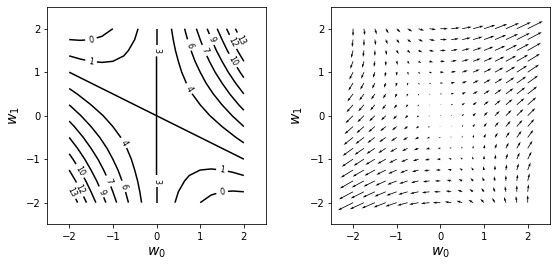

In [6]:
# 勾配を図で表す
import matplotlib.pyplot as plt
%matplotlib inline

## fの定義
def f(w0, w1):
    return ((w0 ** 2) + (2 * w0 * w1) + 3)

## fのw0に関する偏微分
def df_dw0(w0, w1):
    return ((2 * w0) + (2 * w1))

## fのw1に関する偏微分
def df_dw1(w0, w1):
    return ((2 * w0) + (0 * w1))

w_range = 2
dw = 0.25

## arange 等差数列を生成
w0 = np.arange(-w_range, w_range + dw, dw)
w1 = np.arange(-w_range, w_range + dw, dw)

## 配列の要素から格子列を生成
ww0, ww1 = np.meshgrid(w0, w1)

## zeros 0で初期化した配列
ff = np.zeros((len(w0), len(w1)))
dff_dw0 = np.zeros((len(w0), len(w1)))
dff_dw1 = np.zeros((len(w0), len(w1)))

for i0 in range(len(w0)):
    for i1 in range(len(w1)):
        ff[i1, i0] = f(w0[i0], w1[i1])
        dff_dw0[i1, i0] = df_dw0(w0[i0], w1[i1])
        dff_dw1[i1, i0] = df_dw1(w0[i0], w1[i1])


plt.figure(figsize=(9, 4))
plt.subplots_adjust(wspace=0.3)  # グラフ間の間隔を調整
plt.subplot(1, 2, 1)  #  一つの描画キャンパスを複数の領域に分割

## fの等高線表示
cont = plt.contour(ww0, ww1, ff, 10, colors='k')   # 等高線を描画
cont.clabel(fmt='%d', fontsize=8)  # ラベル
plt.xticks(range(-w_range, w_range + 1, 1))  # X軸の目盛り
plt.yticks(range(-w_range, w_range + 1, 1))  # Y軸の目盛り
plt.xlim(-w_range - 0.5, w_range + 0.5)  # グラフの描画範囲を決める（X）
plt.ylim(-w_range - 0.5, w_range + 0.5)  # グラフの描画範囲を決める（Y）
plt.xlabel('$w_0$', fontsize=14)  # ラベル
plt.ylabel('$w_1$', fontsize=14)  # ラベル

## fの勾配のベクトル表示
plt.subplot(1, 2, 2)
plt.quiver(ww0, ww1, dff_dw0, dff_dw1)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.xticks(range(-w_range, w_range + 1, 1))
plt.yticks(range(-w_range, w_range + 1, 1))
plt.xlim(-w_range - 0.5, w_range + 0.5)
plt.ylim(-w_range - 0.5, w_range + 0.5)
plt.show()